# Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix

# Data Preprocessing

In [2]:
SIZE = 256
CHANNELS = 3
n_classes = 10
EPOCHS = 9
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [3]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        directory = 'Dataset/train/tomato/',  # this is the input directory
        target_size = (256, 256),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")

Found 13083 images belonging to 10 classes.


In [6]:
validation_generator = validation_datagen.flow_from_directory(
        'Dataset/valid/tomato/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")

Found 3265 images belonging to 10 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
        'Dataset/test/tomato',
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 1812 images belonging to 10 classes.


# Model Building

In [8]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

# Model Training

In [10]:
history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

Epoch 1/9
817/817 [==============================] - 131s 155ms/step - loss: 1.3634 - accuracy: 0.5231 - val_loss: 1.1489 - val_accuracy: 0.5938
Epoch 2/9
817/817 [==============================] - 127s 155ms/step - loss: 0.8372 - accuracy: 0.7110 - val_loss: 0.6929 - val_accuracy: 0.7479
Epoch 3/9
817/817 [==============================] - 133s 162ms/step - loss: 0.6196 - accuracy: 0.7816 - val_loss: 0.5210 - val_accuracy: 0.8235
Epoch 4/9
817/817 [==============================] - 144s 176ms/step - loss: 0.4997 - accuracy: 0.8249 - val_loss: 0.5817 - val_accuracy: 0.8006
Epoch 5/9
817/817 [==============================] - 126s 154ms/step - loss: 0.4129 - accuracy: 0.8544 - val_loss: 0.4239 - val_accuracy: 0.8523
Epoch 6/9
817/817 [==============================] - 129s 158ms/step - loss: 0.3291 - accuracy: 0.8880 - val_loss: 0.2793 - val_accuracy: 0.9023
Epoch 7/9
817/817 [==============================] - 129s 158ms/step - loss: 0.3030 - accuracy: 0.8958 - val_loss: 0.2335 - val_ac

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Model Analysis

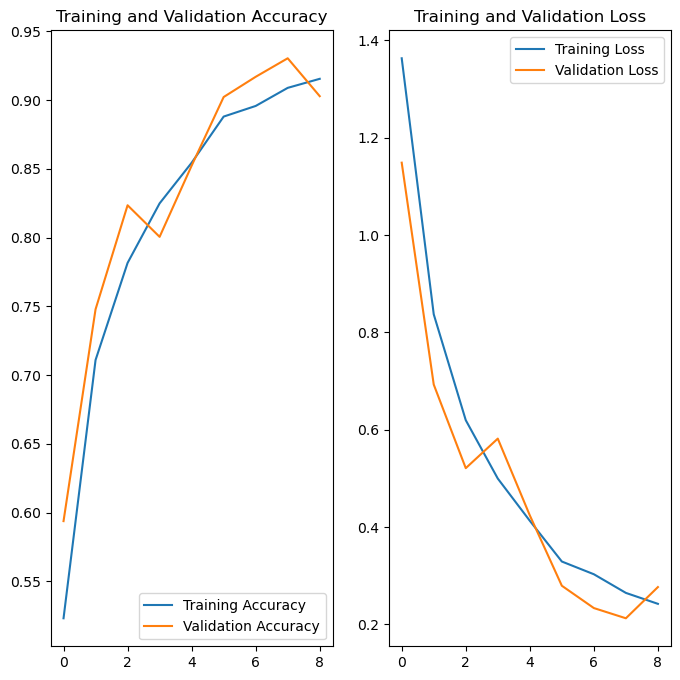

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Evaluation ✅

In [13]:
y_test = []
for i in range(0,1812):
    y_test.append(test_generator[i][1])

In [14]:
Y_pred = model.predict(test_generator)
Y_pred = [np.argmax(i) for i in Y_pred]
y_test = [np.argmax(i) for i in y_test]

1812/1812 [==============================] - 6s 3ms/step


In [15]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       212
           1       0.68      0.88      0.77       100
           2       0.98      0.94      0.96       159
           3       0.95      0.89      0.92       190
           4       0.99      0.81      0.89        95
           5       0.93      0.71      0.81       177
           6       0.93      0.75      0.83       167
           7       0.64      0.96      0.77       140
           8       0.94      0.86      0.90        37
           9       1.00      0.97      0.98       535

    accuracy                           0.90      1812
   macro avg       0.89      0.88      0.88      1812
weighted avg       0.92      0.90      0.90      1812



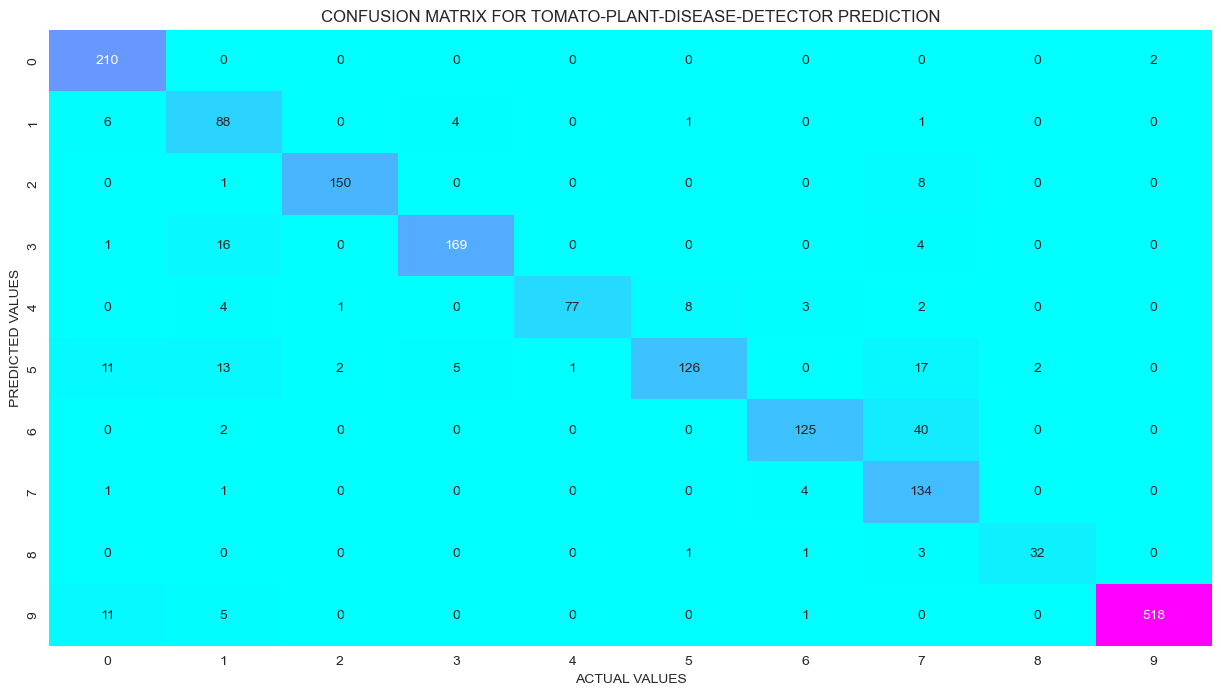

In [16]:
sns.set_style("dark")
plt.figure(figsize=(15,8))
plt.title("CONFUSION MATRIX FOR TOMATO-PLANT-DISEASE-DETECTOR PREDICTION")
cm = confusion_matrix([int(x) for x in y_test],Y_pred)
sns.heatmap(cm, annot=True, cmap="cool", fmt='g', cbar=False)
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")
plt.show()